# Sports Balls Identifier

This model tries to distinguish between few different types of sports balls:
- Basketball
- Volleyball
- Football Ball
- Cricket Ball
- Tennis Ball
- Rugby Ball

In [40]:
from fastai.vision.all import *

Define the classes in the model

In [41]:
ball_types = ['basketball','volleyball','football','cricket','tennis','rugby']

### Download images

In [42]:
import sys
sys.path.insert(1, '/storage/fastbook')
from utils import search_images_ddg

In [43]:
path = Path('./images/sports_balls')

In [44]:
if not path.exists():
    path.mkdir()
    
for b in ball_types:
    dest = path/b
    if not dest.exists():
        dest.mkdir()
        urls = search_images_ddg(b + 'ball', max_n=200)

        i=0
        for url in urls:
            if url[-3:] in ['jpg','JPG'] and i<100:
                i+=1
                try:
                    download_url(url, dest/f'{b}_{i}.{url[-3:]}')
                except:
                    continue

In [45]:
fns = get_image_files(path)
fns

(#554) [Path('images/sports_balls/volleyball/volleyball_42.jpg'),Path('images/sports_balls/volleyball/volleyball_71.jpg'),Path('images/sports_balls/volleyball/volleyball_60.jpg'),Path('images/sports_balls/volleyball/volleyball_2.jpg'),Path('images/sports_balls/volleyball/volleyball_65.jpg'),Path('images/sports_balls/volleyball/volleyball_7.jpg'),Path('images/sports_balls/volleyball/volleyball_98.jpg'),Path('images/sports_balls/volleyball/volleyball_40.jpg'),Path('images/sports_balls/volleyball/volleyball_84.jpg'),Path('images/sports_balls/volleyball/volleyball_36.jpg')...]

In [46]:
failed = verify_images(fns)
failed

(#0) []

In [47]:
failed.map(Path.unlink)

(#0) []

In [48]:
fns = get_image_files(path)
fns

(#554) [Path('images/sports_balls/volleyball/volleyball_42.jpg'),Path('images/sports_balls/volleyball/volleyball_71.jpg'),Path('images/sports_balls/volleyball/volleyball_60.jpg'),Path('images/sports_balls/volleyball/volleyball_2.jpg'),Path('images/sports_balls/volleyball/volleyball_65.jpg'),Path('images/sports_balls/volleyball/volleyball_7.jpg'),Path('images/sports_balls/volleyball/volleyball_98.jpg'),Path('images/sports_balls/volleyball/volleyball_40.jpg'),Path('images/sports_balls/volleyball/volleyball_84.jpg'),Path('images/sports_balls/volleyball/volleyball_36.jpg')...]

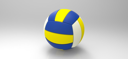

In [49]:
im = Image.open(fns[0])
im.thumbnail((128,128))
im

### Train the model

In [50]:
balls = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    #item_tfms=RandomResizedCrop(224, min_scale=0.7)
    item_tfms=Resize(224, ResizeMethod.Pad, pad_mode='zeros')
    )

In [51]:
dls = balls.dataloaders(path)
dls

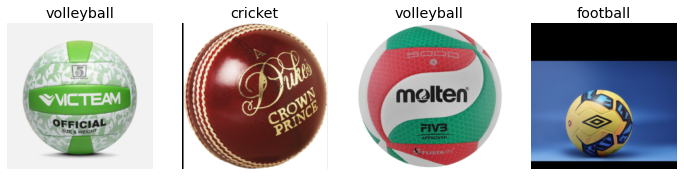

In [52]:
dls.show_batch(max_n=4, nrows=1)

In [53]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.228828,0.516293,0.227273,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.646324,0.191971,0.063636,00:12
1,0.394481,0.170656,0.045455,00:11
2,0.278706,0.156329,0.045455,00:12


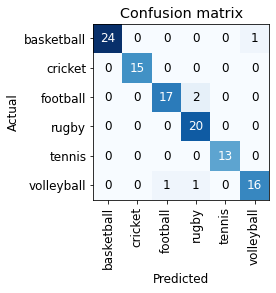

In [54]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

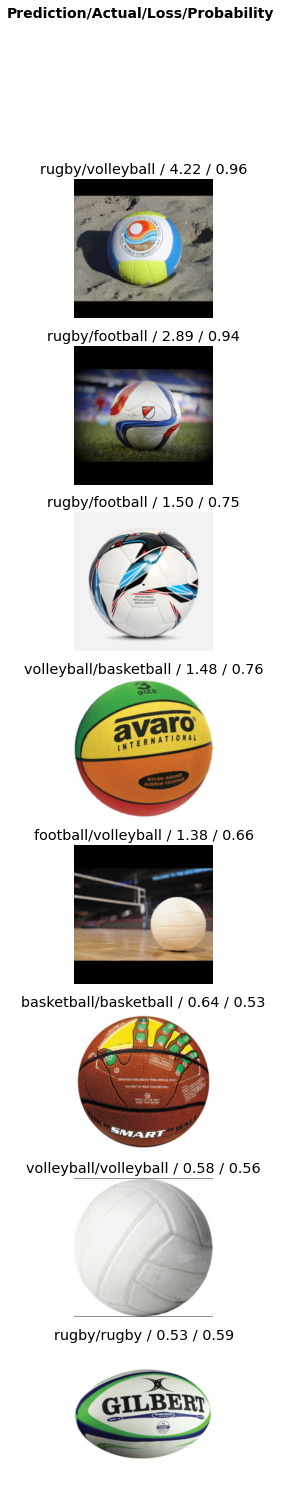

In [55]:
interp.plot_top_losses(8, nrows=8)

In [56]:
#from utils import *
from fastai.vision.widgets import * 
cleaner = ImageClassifierCleaner(learn)
cleaner

In [57]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()